In [3]:
import requests
from tqdm import tqdm
import time

In [8]:
app_key = 'KakaoAK ' + '__my_rest_api_key__'
format = 'json'
host = 'https://dapi.kakao.com'
url = host + f'/v2/local/search/keyword.{format}'

params = {
    'query': '치킨',
    'category_group_code' : 'FD6',
    'page': 45
}

headers = {
    'Authorization': app_key
}

res = requests.get(url, headers=headers, params=params).json()
print(res.keys())


dict_keys(['documents', 'meta'])


In [9]:
res['documents']

[{'address_name': '서울 관악구 봉천동 1679-6',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 치킨',
  'distance': '',
  'id': '25592312',
  'phone': '02-872-0029',
  'place_name': '동네아저씨치킨',
  'place_url': 'http://place.map.kakao.com/25592312',
  'road_address_name': '서울 관악구 행운2길 16',
  'x': '126.959854121382',
  'y': '37.47923555249961'},
 {'address_name': '서울 서초구 반포동 746-9',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 치킨',
  'distance': '',
  'id': '8206545',
  'phone': '02-511-0976',
  'place_name': '금강바비큐치킨',
  'place_url': 'http://place.map.kakao.com/8206545',
  'road_address_name': '서울 서초구 사평대로 349',
  'x': '127.021112618825',
  'y': '37.5037235608715'},
 {'address_name': '대구 중구 삼덕동1가 62-1',
  'category_group_code': 'FD6',
  'category_group_name': '음식점',
  'category_name': '음식점 > 치킨',
  'distance': '',
  'id': '1767432954',
  'phone': '053-252-5575',
  'place_name': '삼덕통닭 동성로점',
  'place_url': 'http:/

In [10]:
res['meta']

{'is_end': True,
 'pageable_count': 45,
 'same_name': {'keyword': '치킨', 'region': [], 'selected_region': ''},
 'total_count': 60675}

# Tiny DB

In [12]:
from tinydb import TinyDB, Query
db = TinyDB('db.json')

## 분할 검색
빵형의 개발도상국 참조: 다음의 [url](https://github.com/kairess/Korea-Chicken-Database/blob/master/chicken_database.ipynb) 

- 가게 page  
  ex) https://place.map.kakao.com/{id} -> place_url
- 가게 page 상세 접근  
  ex) https://place.map.kakao.com/main/v/{id}

In [13]:
start_x = 126 # 126.0 - 130.0
start_y = 33 # 33.0 - 39.0

dx = 0.25
dy = 0.25

for i in tqdm(range(18)):
    for j in range(26):
        x = start_x + dx * i
        y = start_y + dy * j
        print(x, y)

        for page in range(1, 46):
            params = {
                'query': '치킨',
                'page': page,
                'rect': f'{x},{y},{x + dx},{y + dy}'
            }

            res = requests.get(url, params=params, headers=headers).json()
            
            if len(res['documents']) == 0:
                break

            for doc in res['documents']:
                place_name = doc['place_name']

                detail_url = f'https://place.map.kakao.com/main/v/{doc["id"]}'

                data = requests.get(detail_url, headers=headers).json()

                if 'menuInfo' not in data:
                    continue

                menu_list = data['menuInfo']['menuList']

                for menu_item in menu_list:
                    price = 0
                    if 'price' in menu_item:
                        price = int(menu_item['price'].replace(',', ''))

                    db.insert({
                        'place_name': place_name,
                        'menu': menu_item['menu'],
                        'price': price
                    })
                
                time.sleep(10)

            if res['meta']['is_end']:
                break

  0%|          | 0/18 [00:00<?, ?it/s]

126.0 33.0
126.0 33.25


  0%|          | 0/18 [01:42<?, ?it/s]


KeyboardInterrupt: 

시간이 매우 오래 걸리는 관계로 이미 받아진 db로 확인

In [14]:
db = TinyDB('db.json')

In [29]:
db.search((Query().price > 35000) & (Query().menu.search('치')))

[{'place_name': 'DDC치킨 신창점', 'menu': '크리스피치킨', 'price': 11000},
 {'place_name': 'DDC치킨 신창점', 'menu': '양념치킨', 'price': 13000},
 {'place_name': 'DDC치킨 신창점', 'menu': '파닭치킨', 'price': 14000},
 {'place_name': 'DDC치킨 신창점', 'menu': '수제순살마늘치킨', 'price': 16000},
 {'place_name': '스모프치킨 고산점', 'menu': '후라이드 치킨', 'price': 16000},
 {'place_name': '스모프치킨 고산점', 'menu': '양념 치킨', 'price': 17000},
 {'place_name': '스모프치킨 고산점', 'menu': '두부김치', 'price': 17000},
 {'place_name': '멕시카나치킨 협재한림점', 'menu': '달콤라떼치킨+콜라1.25L', 'price': 19500},
 {'place_name': '멕시카나치킨 협재한림점', 'menu': '모두의마요치킨+콜라1.25L', 'price': 19500},
 {'place_name': '멕시카나치킨 협재한림점',
  'menu': '까르보불닭치킨+불닭소스+치즈돈까스+1.25L',
  'price': 25000},
 {'place_name': '멕시카나치킨 협재한림점', 'menu': '불닭치킨+불닭소스+핫도그+1.25L', 'price': 25000},
 {'place_name': '멕시카나치킨 협재한림점', 'menu': '땡초치킨+콜라1.25L', 'price': 19500},
 {'place_name': '멕시카나치킨 협재한림점', 'menu': '양념치킨+콜라1.25L', 'price': 18500},
 {'place_name': '멕시카나치킨 협재한림점', 'menu': '후라이드치킨+콜라1.25L', 'price': 17500},
 {'place_name':

In [30]:
import pandas as pd
chickens = db.search(Query().menu.search('치'))
df_chickens = pd.DataFrame(chickens)
df_chickens.head(5)
len(df_chickens) 

22670

In [19]:
df_chickens.describe()

,price
count,8.000000
mean,56462.500000
std,52748.891322
min,36900.000000
25%,37675.000000
50%,38000.000000
75%,38225.000000
max,187000.000000


In [21]:
df_chickens.value_counts()

place_name    menu             price 
누구나홀딱반한닭 선릉점  바사칸치빵파티          38900     1
누구나홀딱반한닭 홍대점  바사칸치빵파티          36900     1
아웃닭 신촌역점      오리지날 레드핀 양념치킨    187000    1
앗싸마늘닭 본점      앗싸 스페셜 두마리 치찜세트  37900     1
크치치킨 경희대점     치킨세트D            37000     1
화덕에꾸운닭 강원홍천점  랍스터 치킨           38000     1
화덕에꾸운닭 전남담양점  랍스터 치킨           38000     1
화덕에꾸운닭 창원진동점  랍스터 치킨           38000     1
dtype: int64

In [23]:
df_chickens['menu'].unique()

array(['랍스터 치킨', '오리지날 레드핀 양념치킨', '바사칸치빵파티', '치킨세트D', '앗싸 스페셜 두마리 치찜세트'],
      dtype=object)

In [31]:
df_chickens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22670 entries, 0 to 22669
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   place_name  22670 non-null  object
 1   menu        22670 non-null  object
 2   price       22670 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 531.5+ KB


In [32]:
df_chickens.count()

place_name    22670
menu          22670
price         22670
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

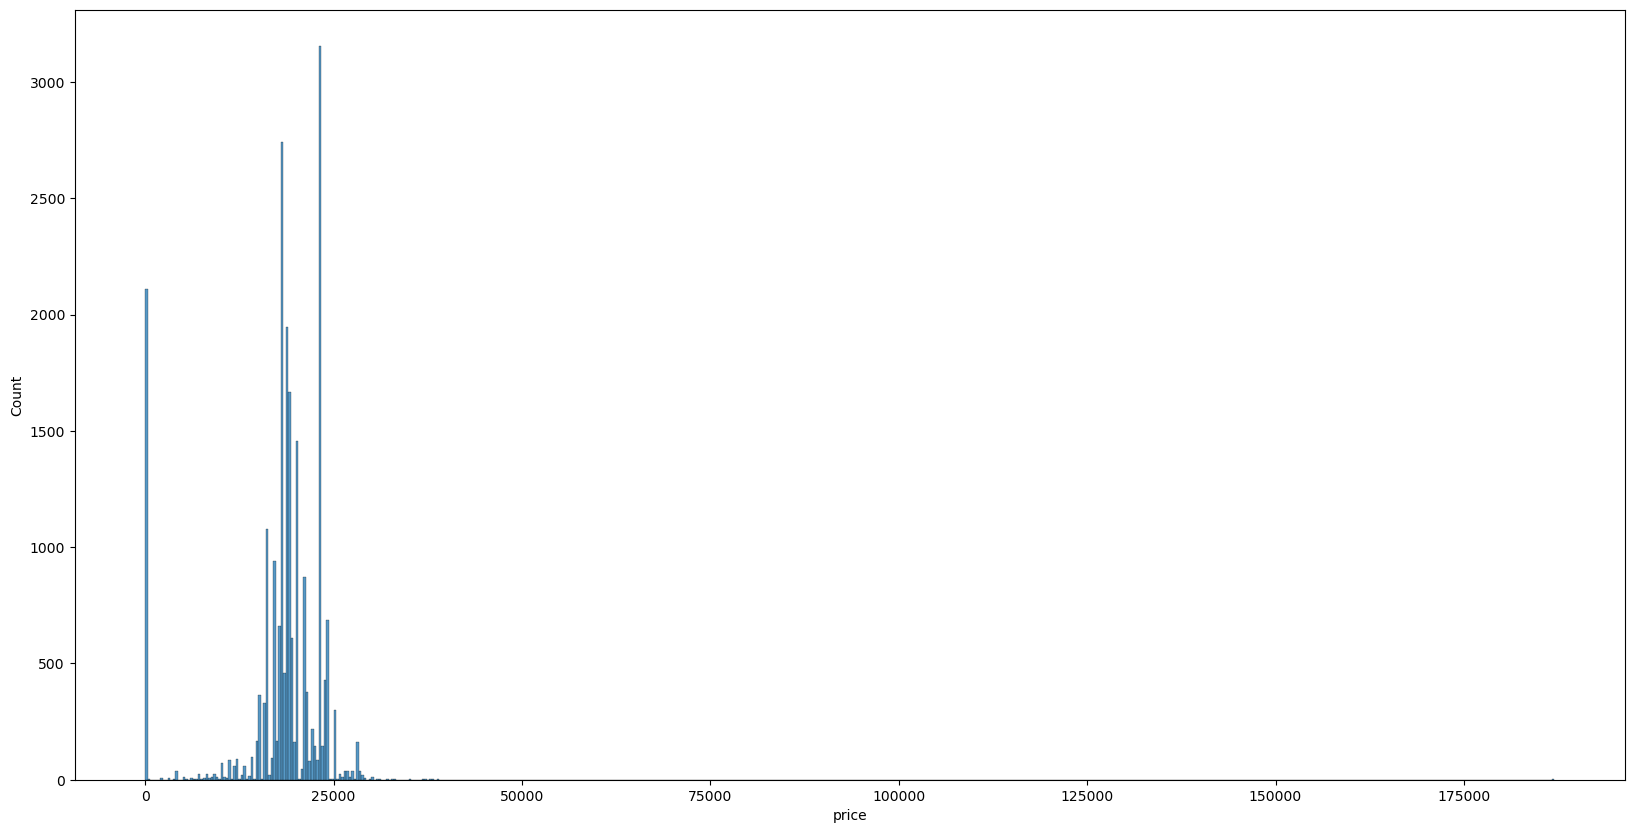

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(x=df_chickens['price'], ax=ax)